# CSE428 Week 3 Coding Assignment

In [1]:
NAME = "MD. ZUNAYEDUL ISLAM"
ID = "20101381"
COLLABORATORS_ID = ["19101107", "19201063"]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )


 

We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [2]:
# Import libraries 

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import img_as_float, exposure, measure, io
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.util import random_noise

In [3]:
# Define helper functions

def plot_image(I, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    
    if len(I.shape) == 2:
        plt.imshow(I, cmap="gray")
    else:
        plt.imshow(I)
        
    plt.axis("off")
    plt.show()
    print("Image Shape:", I.shape)

    
def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.axis('off')
    plt.show()
    print("Kernel shape:", kernel.shape)

    
def gaussian_kernel(width=1, size=10):
    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel / np.sum(kernel)

## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


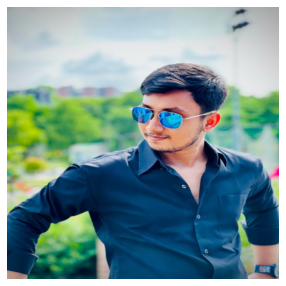

Image Shape: (512, 512, 3)


In [4]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = imread("Images/image.jpeg") / 255
image = resize(image, (512, 512), anti_aliasing=True)

plot_image(image)

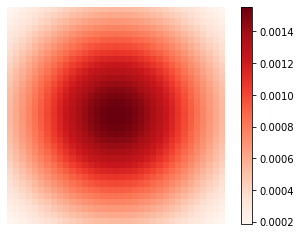

Kernel shape: (35, 35)


In [5]:
# Define a gaussian kernel of size (35, 35)

k = 35
spread = k / 3
kernel = gaussian_kernel(spread, size=k)

plot_kernel(kernel)

In [6]:
# Determine the time to filter the image with the kernel using "direct" method
 
start_time = time.process_time() 
filtered_image_direct = np.zeros(image.shape)

for i in range(image.shape[-1]):
    filtered_image_direct[:, :, i] = signal.correlate(image[:, :, i],
                                                      kernel,
                                                      mode='same',
                                                      method='direct')

print("Time elapsed using direct method of correlation:", round(time.process_time()-start_time, 4), "seconds")

Time elapsed using direct method of correlation: 9.7624 seconds


In [7]:
# Determine the time to filter the image with the kernel using "fft" method
 
start_time = time.process_time() 
filtered_image_fft = np.zeros(image.shape)

for i in range(image.shape[-1]):
    filtered_image_fft[:, :, i] = signal.correlate(image[:, :, i],
                                                   kernel,
                                                   mode='same',
                                                   method='fft')

print("Time elapsed using direct method of correlation:", round(time.process_time()-start_time, 4), "seconds")

Time elapsed using direct method of correlation: 0.0208 seconds


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


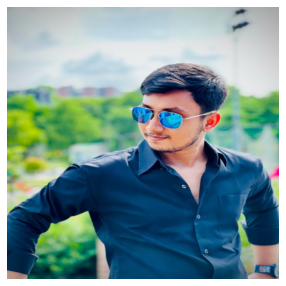

Image Shape: (512, 512, 3)


In [8]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512).
# Downsample if necessary.

image = imread("Images/image.jpeg") / 255
image = resize(image, (512, 512), anti_aliasing=True)

plot_image(image)

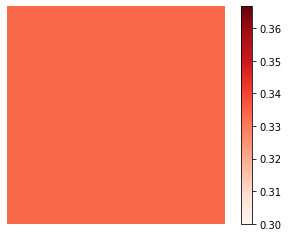

Kernel shape: (105, 105)


In [9]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = np.full(shape=(105, 105),
                           fill_value=1/3)

plot_kernel(kernel_symmetric)

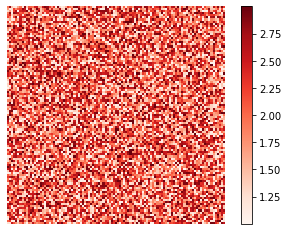

Kernel shape: (105, 105)


In [10]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = np.random.uniform(low=1,
                                      high=3,
                                      size=(105, 105))

plot_kernel(kernel_asymmetric)

In [11]:
# Filter the image with the symmetric kernel using the correlation function
    
filtered_image_symmetric = np.zeros(image.shape)
filtered_image_asymmetric = np.zeros(image.shape)

for i in range(image.shape[-1]):
    filtered_image_symmetric[:, :, i] = signal.correlate(image[:, :, i],
                                                         kernel_symmetric,
                                                         mode='same',
                                                         method='auto')
    filtered_image_asymmetric[:, :, i] = signal.correlate(image[:, :, i],
                                                          kernel_asymmetric,
                                                          mode='same',
                                                          method='auto')
    
filtered_image_symmetric /= filtered_image_symmetric.max()
filtered_image_asymmetric /= filtered_image_asymmetric.max()

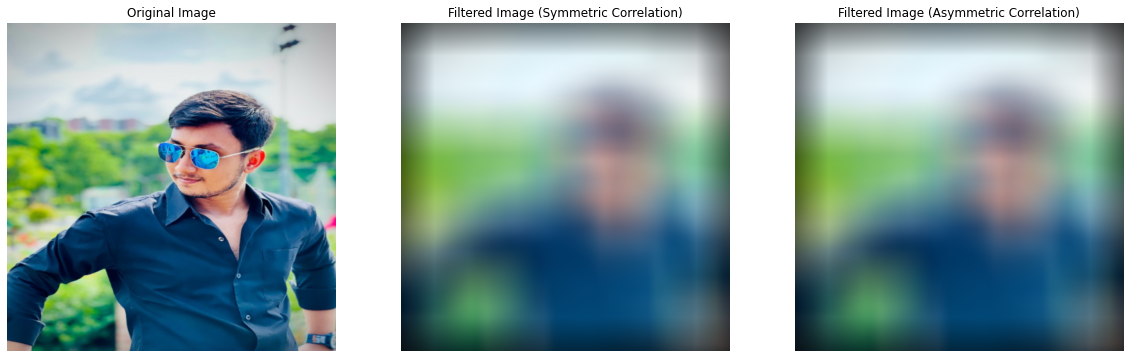

In [12]:
# Display the images side by side (with proper labeling, which is which)

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image)
ax1.title.set_text("Original Image")
ax1.axis('off')

ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(filtered_image_symmetric)
ax1.title.set_text("Filtered Image (Symmetric Correlation)")
ax1.axis('off')

ax1 = fig.add_subplot(1, 3, 3)
ax1.imshow(filtered_image_asymmetric)
ax1.title.set_text("Filtered Image (Asymmetric Correlation)")
ax1.axis('off');

### **Answer to Task 2.1** <br>

### Write your answer here. Compare the outputs.

#### Answer:
It is impossible to notice the difference between the outputs with bare eyes.

Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

In [13]:
# Filter the image with the asymmetric kernel using the convolution function

filtered_image_symmetric = np.zeros(image.shape)
filtered_image_asymmetric = np.zeros(image.shape) 

for i in range(image.shape[-1]):
    filtered_image_symmetric[:, :, i] = signal.convolve(image[:, :, i],
                                                      kernel_symmetric,
                                                      mode='same',
                                                      method='auto') 
    filtered_image_asymmetric[:, :, i] = signal.convolve(image[:, :, i],
                                                         kernel_asymmetric,
                                                         mode='same',
                                                         method='auto')

filtered_image_symmetric /= filtered_image_symmetric.max()
filtered_image_asymmetric /= filtered_image_asymmetric.max()

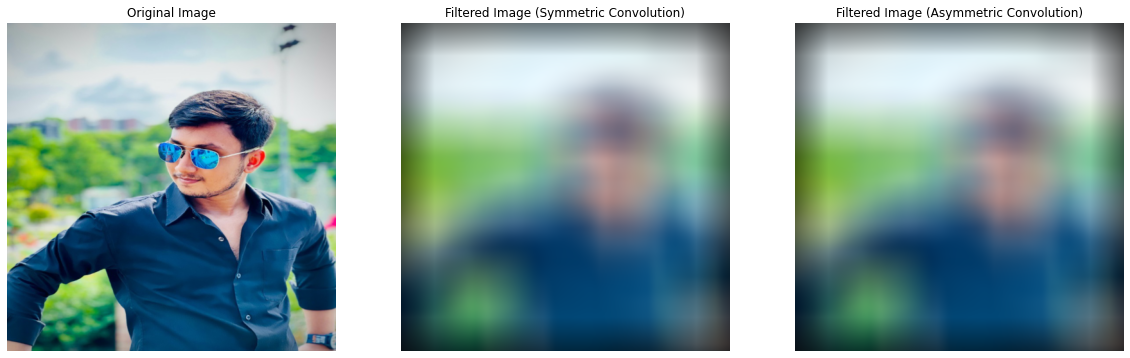

In [14]:
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image)
ax1.title.set_text("Original Image")
ax1.axis('off')

ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(filtered_image_symmetric)
ax1.title.set_text("Filtered Image (Symmetric Convolution)")
ax1.axis('off')

ax1 = fig.add_subplot(1, 3, 3)
ax1.imshow(filtered_image_asymmetric)
ax1.title.set_text("Filtered Image (Asymmetric Convolution)")
ax1.axis('off');

### **Answer to Task 2.2** <br>

### Write your answer here. Compare the outputs.

#### Answer:
It is impossible to notice the difference between the outputs with bare eyes.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

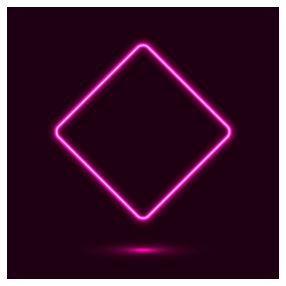

Image Shape: (626, 626, 3)


In [15]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image

image = imread('Images/diamond2.jpeg')

plot_image(image)

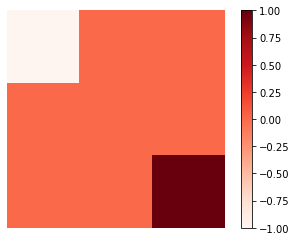

Kernel shape: (3, 3)


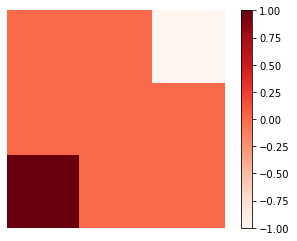

Kernel shape: (3, 3)


In [16]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

kernel_1 = np.array([[-1, 0,0],
                     [0, 0, 0],
                     [0, 0, 1]])

kernel_2 = np.array([[0, 0, -1],
                     [0, 0, 0],
                     [1, 0, 0]])

plot_kernel(kernel_1)
plot_kernel(kernel_2)

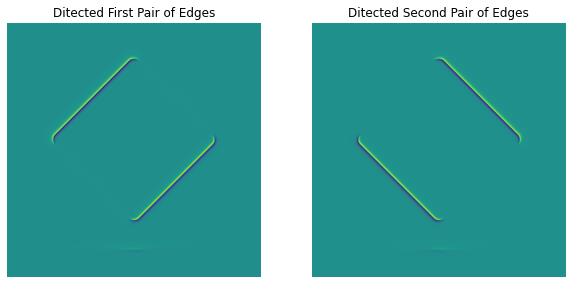

In [17]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

first_pair_detected = signal.correlate(rgb2gray(image),
                                       kernel_1,
                                       mode='same',
                                       method='auto')

# detect the second pair using image filtering with kernel_2

second_pair_detected = signal.correlate(rgb2gray(image),
                                       kernel_2,
                                       mode='same',
                                       method='auto')

# plot the two filtered images side by side

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(first_pair_detected) 
ax1.title.set_text('Ditected First Pair of Edges')
ax1.axis("off")

ax1 = fig.add_subplot(1, 2, 2)
ax1.imshow(second_pair_detected) 
ax1.title.set_text('Ditected Second Pair of Edges')
ax1.axis("off");

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?

#### Answer:
Here, after trying some random kernels putting a positive and negative value of a diagonal gives the correct output. We can also use different values and mix of different lines to get the output so this one isn't unique kernel.

## **Task 4: Image Denoising** <br>
### Take something.jpg image and corrupt it with *gaussian noise* of 0 mean and 0.2 variance. Denoise the image using:

1.   Total Variation Denoising (TVD)
2.   Bilateral Filtering (BF)

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.

something.jpg can be downloaded from here: https://drive.google.com/file/d/1KgoZJDsTIW_NMh8LJ5oUneAQkIQsfzKT/view?usp=sharing


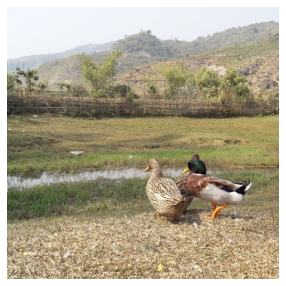

Image Shape: (1012, 1012, 3)


In [18]:
# Download the image from the drive link above and upload it to your current working directory in colab
# Then load the image "something.jpg"

image = imread('Images/something.jpg')

plot_image(image)

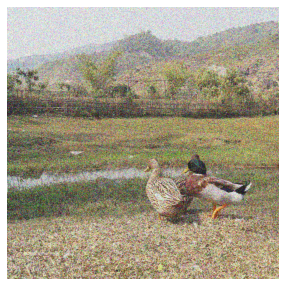

Image Shape: (1012, 1012, 3)


In [19]:
# corrupt the original image

image_noisy = random_noise(image,
                           mode='gaussian',
                           mean=0,
                           var=0.1)

plot_image(image_noisy)

In [20]:
# import the bilateral filter
from skimage.restoration import denoise_bilateral

# import the total variation denoising filter
from skimage.restoration import denoise_tv_chambolle 

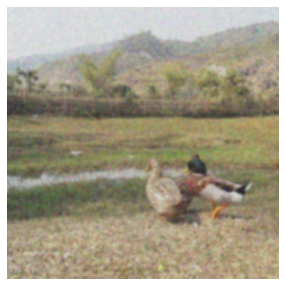

Image Shape: (1012, 1012, 3)


In [21]:
# clean the image using TVD

image_denoised_tvd = denoise_tv_chambolle(image_noisy,
                                          weight=5,
                                          eps=0.001,
                                          max_num_iter=1000,
                                          channel_axis=2)

plot_image(image_denoised_tvd)

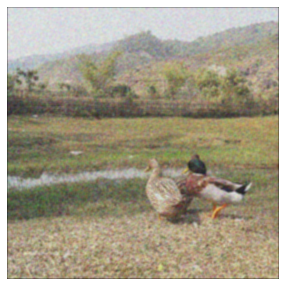

Image Shape: (1012, 1012, 3)


In [22]:
# clean the image using BF

image_denoised_bf = denoise_bilateral(image_noisy,
                                      win_size=10,
                                      sigma_color=50,
                                      sigma_spatial=10,
                                      channel_axis=2)

plot_image(image_denoised_bf)

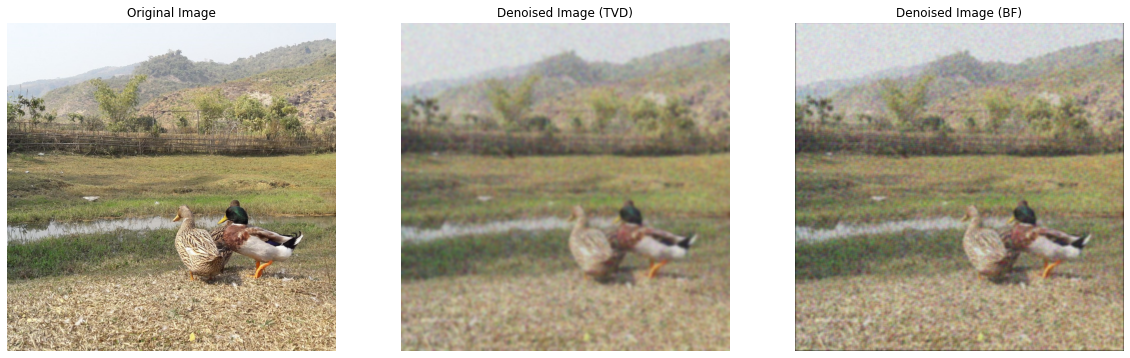

In [23]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image) 
ax1.title.set_text('Original Image')
ax1.axis("off")

ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(image_denoised_tvd) 
ax1.title.set_text('Denoised Image (TVD)')
ax1.axis("off")

ax1 = fig.add_subplot(1, 3, 3)
ax1.imshow(image_denoised_bf) 
ax1.title.set_text('Denoised Image (BF)')
ax1.axis("off");

In [24]:
# compute the MSE

mse_tvd = np.sum((image - image_denoised_tvd) ** 2) / (image.shape[0] * image.shape[1])
mse_bf = np.sum((image - image_denoised_bf) ** 2) / (image.shape[0] * image.shape[1])

print("MSE of TVD:", round(mse_tvd, 4))
print("MSE of BF:", round(mse_bf, 4))

MSE of TVD: 75505.803
MSE of BF: 75507.8802


### **Answer to Task 4** <br>

### Write your answer here. Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE). Which parameters did you tweak? How did that impact the end result? 
#### Answer:
Here from the picture, we can see that the output from TVD seems smoother and more detailed, which can be seen from the MSE also where the error of TVD is less than BF. I changed the `weight` and `eps` of TVD and noticed that the lower the `eps` the code takes more time to execute. On the other hand, more `weight` makes it blurry but eventually this change didn't affect MSE significantly.

## **The END**